In [27]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_colwidth = 500




In [28]:
output_dir = '/mnt/data/maca-facs-sourmash_search'


!ls -lha $output_dir

total 49M
drwxrwxr-x  2 ubuntu ubuntu 4.0K Sep 17 17:31 .
drwxr-xr-x 24 ubuntu root   4.0K Sep 15 01:51 ..
-rw-rw-r--  1 ubuntu ubuntu 7.2M Sep 13 02:08 A1-B000610-3_56_F-1-1.csv
-rw-rw-r--  1 ubuntu ubuntu 8.8M Sep 15 06:48 A1-B000610-3_56_F-1-1_k21-dna.csv
-rw-rw-r--  1 ubuntu ubuntu    0 Sep 17 17:31 A1-B000610-3_56_F-1-1_k21-protein.csv
-rw-rw-r--  1 ubuntu ubuntu    0 Sep 17 17:31 A1-B000610-3_56_F-1-1_k21-protein.err
-rw-rw-r--  1 ubuntu ubuntu    0 Sep 17 17:31 A1-B000610-3_56_F-1-1_k21-protein.out
-rw-rw-r--  1 ubuntu ubuntu    0 Sep 13 20:32 A1-B000610-3_56_F-1-1_k27.csv
-rw-rw-r--  1 ubuntu ubuntu  14M Sep 15 13:45 A1-B000610-3_56_F-1-1_k27-dna.csv
-rw-rw-r--  1 ubuntu ubuntu    0 Sep 15 06:48 A1-B000610-3_56_F-1-1_k27-protein.csv
-rw-rw-r--  1 ubuntu ubuntu 9.2M Sep 15 20:10 A1-B000610-3_56_F-1-1_k33-dna.csv
-rw-rw-r--  1 ubuntu ubuntu    0 Sep 15 13:45 A1-B000610-3_56_F-1-1_k33-protein.csv
-rw-rw-r--  1 ubuntu ubuntu 8.9M Sep 16 06:22 A1-B000610-3_56_F-1-1_k51-dna.csv
-rw-r

In [29]:
! head -n 3 $output_dir/*k*-*csv

==> /mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k21-dna.csv <==




==> /mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k21-protein.csv <==

==> /mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k27-dna.csv <==




==> /mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k27-protein.csv <==

==> /mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k33-dna.csv <==




==> /mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k33-protein.csv <==

==> /mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k51-dna.csv <==




==> /mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k51-protein.csv <==


In [30]:
import glob
import os
import re

dfs = []

pattern = 'k(?P<ksize>\d+)-(?P<sequence>\w+)'


for filename in glob.glob(f'{output_dir}/*k*-*csv'):
    print(filename)
    basename = os.path.basename(filename)
    ksize, sequence = re.findall(pattern, basename)[0]
    ksize = int(ksize)
    try:
        df = pd.read_csv(filename)
    except pd.io.parsers.EmptyDataError:
        continue
        
    
    df['ksize'] = ksize
    df['sequence'] = sequence
    dfs.append(df)
    
search_results = pd.concat(dfs, ignore_index=True)
search_results.head()

/mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k21-protein.csv
/mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k27-protein.csv
/mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k27-dna.csv
/mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k51-protein.csv
/mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k33-dna.csv
/mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k51-dna.csv
/mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k21-dna.csv
/mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1_k33-protein.csv


,similarity,name,filename,md5,ksize,sequence
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,2fc921ee405e5df7f6b2ebca90f6e06d,27,dna
1,0.684804,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:N1-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,9346be8eb7284b90301f92367b41a981,27,dna
2,0.669025,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,84a81d16a8c03d005d03f98b3408514e,27,dna
3,0.667703,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:P1-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,b7592a52c2b41bd9ea4705b55923a062,27,dna
4,0.643019,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:O3-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,0b4ccc7b0001179b8ca8fd034d016c31,27,dna


In [43]:
def combine_cell_ontology_free_annotation(row):
    if pd.notnull(row['free_annotation']):
        return '{cell_ontology_class} ({free_annotation})'.format(**row)
    else:
        return row['cell_ontology_class']


def extract_cell_annotations(name_column):
    pattern = '(\w+):([\w\d\-_]+)'
    expanded = name_column.str.extractall(pattern)
    expanded_index = expanded.reset_index()
    annotations = expanded_index.pivot(columns=0, values=1, index='level_0')
    annotations['cell_ontology_free_annotation'] = annotations.apply(combine_cell_ontology_free_annotation, axis=1)
    return annotations 

In [44]:
cell_annotation_pattern = '(\w+):([\w\d\-_]+)'

annotations = extract_cell_annotations(search_results.name)
annotations.head()

,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
level_0,,,,,,
0,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
1,N1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
2,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
3,P1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
4,O3-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


In [45]:
search_results_annotated = search_results.join(annotations)
print(search_results_annotated.shape)
search_results_annotated.head()

(148146, 12)


,similarity,name,filename,md5,ksize,sequence,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,2fc921ee405e5df7f6b2ebca90f6e06d,27,dna,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
1,0.684804,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:N1-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,9346be8eb7284b90301f92367b41a981,27,dna,N1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
2,0.669025,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,84a81d16a8c03d005d03f98b3408514e,27,dna,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
3,0.667703,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:P1-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,b7592a52c2b41bd9ea4705b55923a062,27,dna,P1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
4,0.643019,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:O3-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,0b4ccc7b0001179b8ca8fd034d016c31,27,dna,O3-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


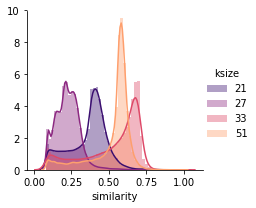

In [46]:
g = sns.FacetGrid(search_results_annotated, hue='ksize', palette='magma')
g.map(sns.distplot, 'similarity')
g.add_legend()

In [47]:
tissue_colors = pd.read_csv('/home/ubuntu/tabula-muris/00_data_ingest/15_color_palette/tissue_colors.csv', 
                            squeeze=True, index_col=0)
tissue_colors.head()

Aorta                #1f77b4
Bladder              #aec7e8
Brain_Myeloid        #ff7f0e
Brain_Non-Myeloid    #ffbb78
Diaphragm            #2ca02c
Name: color, dtype: object

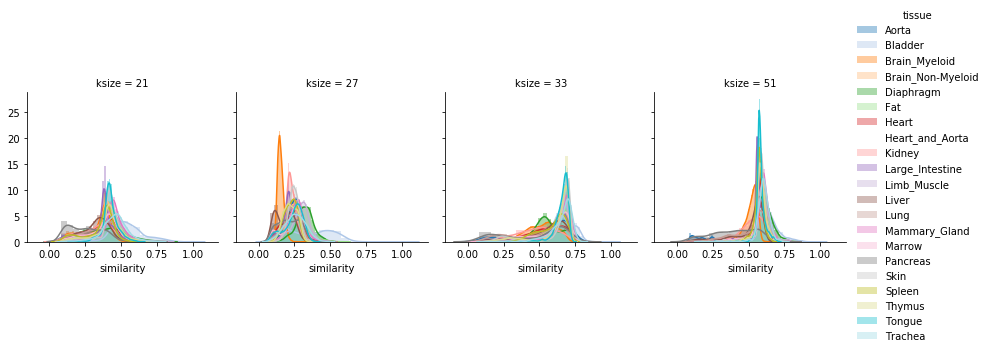

In [48]:
g = sns.FacetGrid(search_results_annotated, col='ksize', hue='tissue', 
                  palette=tissue_colors, hue_order=tissue_colors.index)
g.map(sns.distplot, 'similarity')
g.add_legend()

In [49]:
search_results_annotated_bladder = search_results_annotated.query('tissue == "Bladder"')
print(search_results_annotated_bladder.shape)
search_results_annotated_bladder.head()

(3918, 12)


,similarity,name,filename,md5,ksize,sequence,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,2fc921ee405e5df7f6b2ebca90f6e06d,27,dna,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
1,0.684804,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:N1-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,9346be8eb7284b90301f92367b41a981,27,dna,N1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
2,0.669025,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,84a81d16a8c03d005d03f98b3408514e,27,dna,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
3,0.667703,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:P1-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,b7592a52c2b41bd9ea4705b55923a062,27,dna,P1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
4,0.643019,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:O3-B000610-3_56_F-1-1,/mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-dna/tabula-muris-k27-dna/tabula-muris-k27-dna.sbt.json,0b4ccc7b0001179b8ca8fd034d016c31,27,dna,O3-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


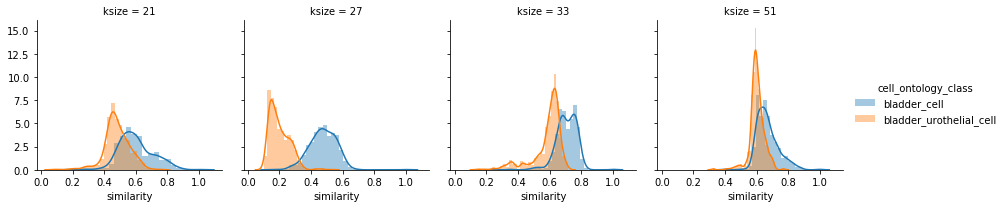

In [50]:
g = sns.FacetGrid(search_results_annotated_bladder, col='ksize', hue='cell_ontology_class')
g.map(sns.distplot, 'similarity')
g.add_legend()

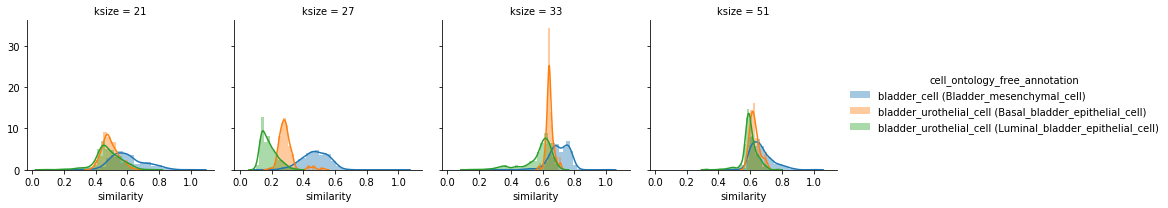

In [51]:
g = sns.FacetGrid(search_results_annotated_bladder, col='ksize', hue='cell_ontology_free_annotation')
g.map(sns.distplot, 'similarity')
g.add_legend()

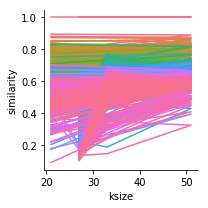

In [55]:
g = sns.FacetGrid(search_results_annotated_bladder,  hue='name')
g.map(plt.plot, 'ksize', 'similarity')
# g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


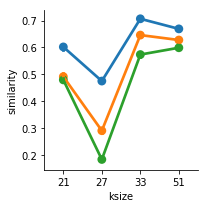

In [54]:
g = sns.FacetGrid(search_results_annotated_bladder,  hue='cell_ontology_free_annotation')
g.map(sns.pointplot, 'ksize', 'similarity')
# g.add_legend()